In [404]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : Neural Network

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [405]:
data = pd.read_csv ('../input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [406]:
data.shape

(768, 9)

In [407]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

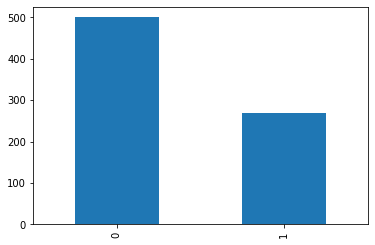

In [409]:
data['Outcome'].value_counts().plot(kind = 'bar')

In [410]:
x=data.drop(['Outcome'],axis=1).values
y=data['Outcome'].values
print (x)
print (y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [411]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [412]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)
print(x_test)
print(x_train)

[[0.41176471 0.68341709 0.67272727 ... 0.43771044 0.24295474 0.5       ]
 [0.05882353 0.75879397 0.54545455 ... 0.43939394 0.04312553 0.01666667]
 [0.35294118 0.54773869 0.54545455 ... 0.42087542 0.05465414 0.1       ]
 ...
 [0.47058824 0.94472362 0.70909091 ... 0.80639731 0.02519214 0.36666667]
 [0.29411765 0.68341709 0.74545455 ... 0.         0.23996584 0.8       ]
 [0.23529412 0.45226131 0.         ... 0.47138047 0.22715628 0.16666667]]
[[0.6        0.73232323 0.6557377  ... 0.56482861 0.24632517 0.37254902]
 [0.66666667 0.65151515 0.50819672 ... 0.61400894 0.15902004 0.33333333]
 [0.46666667 0.51515152 0.60655738 ... 0.55439642 0.05345212 0.47058824]
 ...
 [0.86666667 0.63636364 0.73770492 ... 0.64679583 0.22227171 0.41176471]
 [0.26666667 0.86363636 0.59016393 ... 0.64977645 0.17594655 0.09803922]
 [0.6        0.51515152 0.62295082 ... 0.49031297 0.25879733 0.49019608]]


In [413]:
kerasmodel = Sequential()
kerasmodel.add(Dense(12,input_dim=8,activation='relu'))
kerasmodel.add(Dense(8,activation ='relu'))
kerasmodel.add(Dense(1,activation = 'sigmoid'))

In [414]:
#compling modeling
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam',metrics =['accuracy'])

In [415]:
#fitting model
kerasmodel.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.3495
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6498
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6129
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6364
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.6717
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6488
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6335
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6355
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.6667
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6819
Epoch 11/

In [416]:
_, accuracy = kerasmodel.evaluate(x_train, y_train)
print ('Train Accurancy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8046
Train Accurancy: 80.46


In [417]:
y_prediksi = clf.predict(x_test)
print (y_prediksi)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [418]:
round (accuracy_score(y_test,y_prediksi),3)

0.773